**Основной ноутбук:**

https://colab.research.google.com/drive/1pH872O1nO0uj-2ru-iM9fkHush8AwU_V?usp=drive_link

В данном ноутбуке проводится сравнительный анализ разных методов подсчёта свёртки для этапа PEB. Сравнивается время расчётов, т.к. нужна самая быстрая функция, которая позволит считать как можно больше итераций.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Подготовка данных: обработка файла со скрытыми изображениями

* x_data, z_data - отдельно, т.к. они одинаковые для всех значений дозы и фокуса

* data1 содержит список словарей со значениями dose, focus, I_data

In [ ]:
!wget --no-check-certificate -r 'https://drive.google.com/uc?export=download&id=1UShFVaFrhMhoFs8l1fuZCQtfh4MZoXdO' -O example.txt

will be placed in the single file you specified.

--2024-12-23 07:01:13--  https://drive.google.com/uc?export=download&id=1UShFVaFrhMhoFs8l1fuZCQtfh4MZoXdO
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.102, 142.251.2.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1UShFVaFrhMhoFs8l1fuZCQtfh4MZoXdO&export=download [following]
--2024-12-23 07:01:13--  https://drive.usercontent.google.com/download?id=1UShFVaFrhMhoFs8l1fuZCQtfh4MZoXdO&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 835115 (816K) [application/octet-stream]
Saving to: ‘example.txt’

example.txt         10

In [ ]:
filename = 'example.txt'

In [ ]:
file = open(filename, 'r')
data = ''.join(file.readlines()).split('!!!')
file.close()

In [ ]:
tmp = data[1]
start = tmp.find('Image in resist X-Axis data:') + len('Image in resist X-Axis data:')
end = tmp.find('Image in resist Y-Axis data:')
x_data = tmp[start:end]
x_data = x_data[2:]
x_data = x_data[:-2]
x_data = x_data.replace('\n', '').split()
x_data = [float(i) for i in x_data]
print(x_data)

[-1160.0, -1155.0, -1150.0, -1145.0, -1140.0, -1135.0, -1130.0, -1125.0, -1120.0, -1115.0, -1110.0, -1105.0, -1100.0, -1095.0, -1090.0, -1085.0, -1080.0, -1075.0, -1070.0, -1065.0, -1060.0, -1055.0, -1050.0, -1045.0, -1040.0, -1035.0, -1030.0, -1025.0, -1020.0, -1015.0, -1010.0, -1005.0, -1000.0, -995.0, -990.0, -985.0, -980.0, -975.0, -970.0, -965.0, -960.0, -955.0, -950.0, -945.0, -940.0, -935.0, -930.0, -925.0, -920.0, -915.0, -910.0, -905.0, -900.0, -895.0, -890.0, -885.0, -880.0, -875.0, -870.0, -865.0, -860.0, -855.0, -850.0, -845.0, -840.0, -835.0, -830.0, -825.0, -820.0, -815.0, -810.0, -805.0, -800.0, -795.0, -790.0, -785.0, -780.0, -775.0, -770.0, -765.0, -760.0, -755.0, -750.0, -745.0, -740.0, -735.0, -730.0, -725.0, -720.0, -715.0, -710.0, -705.0, -700.0, -695.0, -690.0, -685.0, -680.0, -675.0, -670.0, -665.0, -660.0, -655.0, -650.0, -645.0, -640.0, -635.0, -630.0, -625.0, -620.0, -615.0, -610.0, -605.0, -600.0, -595.0, -590.0, -585.0, -580.0, -575.0, -570.0, -565.0, -560.0

In [ ]:
tmp = data[1]
start = tmp.find('Image in resist Z-Axis data:') + len('Image in resist Z-Axis data:')
end = tmp.find('Image in resist values:')
z_data = tmp[start:end]
z_data = z_data[2:]
z_data = z_data[:-2]
z_data = z_data.replace('\n', '').split()
z_data = [float(i) for i in z_data]
print(z_data)

[710.0, 705.0, 700.0, 695.0, 690.0, 685.0, 680.0, 675.0, 670.0, 665.0, 660.0, 655.0, 650.0, 645.0, 640.0, 635.0, 630.0, 625.0, 620.0, 615.0, 610.0, 605.0, 600.0, 595.0, 590.0, 585.0, 580.0, 575.0, 570.0, 565.0, 560.0, 555.0, 550.0, 545.0, 540.0, 535.0, 530.0, 525.0, 520.0, 515.0, 510.0, 505.0, 500.0, 495.0, 490.0, 485.0, 480.0, 475.0, 470.0, 465.0, 460.0, 455.0, 450.0, 445.0, 440.0, 435.0, 430.0, 425.0, 420.0, 415.0, 410.0, 405.0, 400.0, 395.0, 390.0, 385.0, 380.0, 375.0, 370.0, 365.0, 360.0, 355.0, 350.0, 345.0, 340.0, 335.0, 330.0, 325.0, 320.0, 315.0, 310.0, 305.0, 300.0, 295.0, 290.0, 285.0, 280.0, 275.0, 270.0, 265.0, 260.0, 255.0, 250.0, 245.0, 240.0, 235.0, 230.0, 225.0, 220.0, 215.0, 210.0, 205.0, 200.0, 195.0, 190.0, 185.0, 180.0, 175.0, 170.0, 165.0, 160.0, 155.0, 150.0, 145.0, 140.0, 135.0, 130.0, 125.0, 120.0, 115.0, 110.0, 105.0, 100.0, 95.0, 90.0, 85.0, 80.0, 75.0, 70.0, 65.0, 60.0, 55.0, 50.0, 45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0, 0.0]


In [ ]:
data1 = []
for elem in data[1:]:
  tmp = elem.split('\n')
  dose = float(tmp[1][tmp[1].find('=') + 1:])
  #print(dose)
  focus = round(float(tmp[2][tmp[2].find('=') + 1:]), 1)
  #print(focus)
  start = elem.find('[[[')
  end = elem.find(']]]') + len(']]]')
  I_data = elem[start:end]
  I_data = I_data.replace('\n', '').replace('[', '').replace(']', '').split()
  I_data = [float(i) for i in I_data]
  I_data = np.array(I_data).reshape((len(x_data), len(z_data)))
  #print(len(I_data[1]))
  data1.append({'dose': dose, 'focus': focus, 'I_data' : I_data})

In [ ]:
I = data1[0]['I_data']

Text(0.5, 1.0, 'Скрытое изображение в толще фоторезиста')

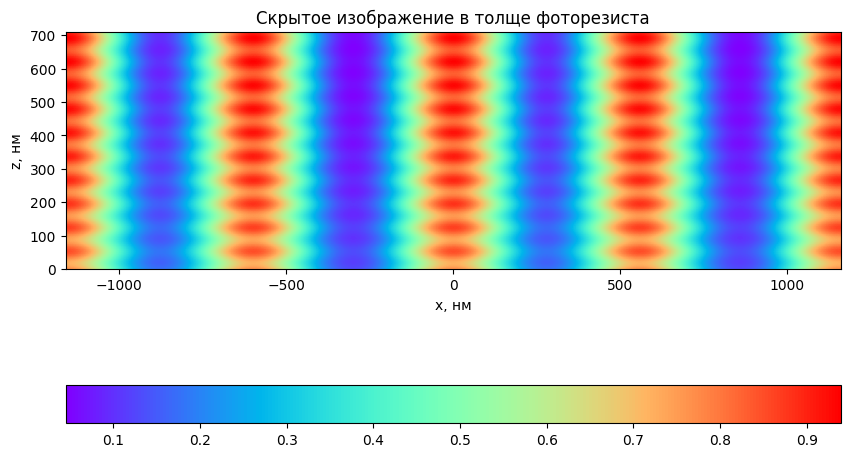

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
p = axs.imshow(np.transpose(I), cmap='rainbow', aspect=1, origin="lower",
               extent=[x_data[0],x_data[-1],z_data[-1],z_data[0]])
axs.set_xlabel('x, нм')
axs.set_ylabel('z, нм')
fig.colorbar(p, location='bottom')
axs.set_title('Скрытое изображение в толще фоторезиста')

#Подготовка данных: этап экспозиции

Распределение концентрации светочувствительного компонента фоторезиста (в случае ДХН резиста это PAC, в случае химически усиленных резистов это PAG) после этапа экспозиции можно вычислить по следующей формуле:

\begin{align}
    m(x, z) = exp(-C * I(x, z) * Dose)
\end{align}

где


*   $C$ - коэффициент Дилла для данного резиста
*   $I(x, z)$ - распределение интенсивности экспонирующего излучения в толще резиста (скрытое изображение)
*   $Dose$ - доза облучения фоторезиста $[\frac{мДж}{см^2}]$



In [ ]:
def step_exposure(dill_C, dose, I_in):
  m = np.exp(-1 * dill_C * I_in * dose)
  return m

In [ ]:
def step_exposure_plot(x, z, m):
  fig, axs = plt.subplots(1, 1, figsize=(10,10))
  p = axs.imshow(np.transpose(m), cmap='rainbow', aspect=1, origin="lower",
                 extent=[x[0],x[-1],z[-1],z[0]])
  axs.set_xlabel('x, нм')
  axs.set_ylabel('z, нм')
  fig.colorbar(p, location='bottom')
  axs.set_title('Этап экспозиции\nКонцентрация светочувствительного \
  копонента\n')

In [ ]:
my_m = step_exposure(0.031, I, 38.0)

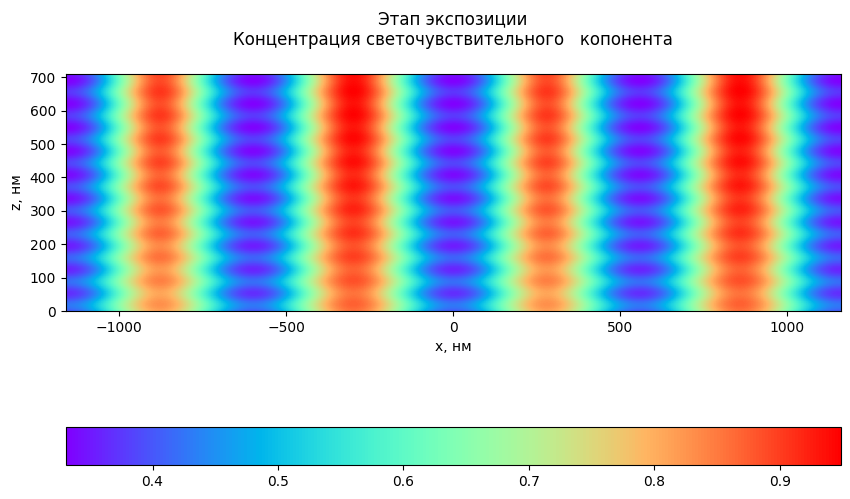

In [ ]:
step_exposure_plot(x_data, z_data, my_m)

#Этап PEB (no CAR). Сравнение методов подсчёта свёртки

Для ДХН фоторезистов этап постэкспозиционной сушки представлен диффузией его фотоактивной составляющей, которая описывается свёрткой функции распределения PAC с функцией Гаусса:


\begin{align}
    w(x, z) = m(x, z) \ast DPSF
\end{align}  


\begin{align}
    DPSF = \frac{1}{2\pi\sigma^2}exp(-\frac{x^2 + z^2}{2\sigma^2})
\end{align}

$\sigma$ выражается через постоянную диффузии как:

\begin{align}
    \sigma = \sqrt{2Dt}
\end{align}

\begin{align}
    D(T) = A_rexp(-\frac{E_a}{RT})
\end{align}

*   $A_r$ - постоянная Аррениуса для диффузии
*   $E_a$ - энергия активации реакции диффузии
*   $R$ - универсальная газовая постоянная
*   $T$ - температура

Также нужно учесть, что Гауссиан нужно будет отнормировать так, чтобы в сумме все значения были 1. Иначе концентрация PAC/PAG взлетит выше 1, что нефизично. *В случае функции gaussian_filter нормировка уже вшита.*

**Возможность перехода к оптимизации длины диффузии вместо набора (Ea, Ar)**

Можно заметить, что на данном этапе у нас в некотором смысле имеется только одна переменная - длина диффузии $\sigma$. Она, в свою очередь, зависит от таких переменных процесса как время сушки $t$ и температура сушки $T$, а также от характеристик резиста $Ea$ и $Ar$. В данной работе проще оценивать именно параметр $\sigma$, вместо $Ea$ и $Ar$. Таким образом будет проще отслеживать адекватность модели (например, сразу видно, что вряд ли длина диффузии 300 нм для процесса 180 нм - это нормально). Минусом данного подхода будет то, что данное значение $\sigma$ не будет являться характеристикой резиста, его можно будет использовать только на этом датасете. Но в любом случае для нахождения параметров $Ea$ и $lnAr$ нам необходимо как минимум два датасета с разными значениями $t$ и $T$, иначе получаем "два неизвестных и одно уравнение".

**Итого**: будем оптимизировать значение $\sigma$ вместо $Ea$ и $Ar$. Это значение можно использовать **только на данном датасете**. Для нахождения именно характеристик резиста $Ea$ и $Ar$ необходимо как минимум два датасета с отличающимися значениями времени и температуры сушки.

На всякий случай всё равно написала функцию подсчёта $\sigma$

In [ ]:
#Константа может понадобится
R = 8.31446261815324   #[Дж/(моль∙К)]

In [ ]:
def calculate_sigma(lnAr, Ea, T, t):
  da = np.exp(lnAr - Ea * 4184/ (R * (T + 273)))   #перевод в К!  1klcal = 4184 J
  sigma = np.sqrt(2 * da * t)
  return sigma

##Скорость вычисления свёртки

Пока из всех операций эта самая длинная. Долгие расчёты даже для одной итерации моделирования существенно уменьшают кол-во возможных итераций в оптимизации. Поэтому будем искать самый быстрый способ вычисления свёртки.

**Сложность алгоритма**

*Вычисление свёртки требует $O(N^2)$ операций. Это количество может быть существенно уменьшено с помощью вычисления свёртки различными быстрыми алгоритмами.*

*Чаще всего для уменьшения количества операций свёртка вычисляется с помощью двух преобразований Фурье, каждое из которых рассчитывается с помощью быстрых алгоритмов. Это позволяет снизить вычислительную сложность операции свёртки до $O(NlogN)$.*

https://ru.wikipedia.org/wiki/%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BA%D0%B0_%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9

**Какой может быть длина диффузии?**

С одной стороны, для избавления от эффекта стоячих волн, длина диффузии должна быть порядка или больше, чем половина периода стоячей волны. Но, чтобы не исказить размеры самих структур, длина диффузии должна быть значительно меньше самой маленькой печатаемой структуры.

Для i-line типичное значение полупериода стоячих волн - 55 нм. Т.к. на такой длине волны не печатают структуры размером меньше 300 нм, то второе условие тоже удовлетворяется. Т.е. длина диффузии порядка или больше 55 нм на такой длине волны.

В случае 248 нм период стоячих волн 35-40 нм, а структуры менее 130 нм печатаются. На 248 и 193 нм нельзя удовлетворить обоим условиям, поэтому для уменьшения эффекта стоячих волн используются антиотражающие покрытия. 1/3 размера структуры - это слишком большое значение для длины диффузии.

**Итого:** длина диффузии точно меньше 1/3 критического размера. В Маке в графиках максимально встречалась диффузионная длина 150 нм. У нас она скорее всего значительно меньше, но можно рассматривать ***150 нм как некоторый крайний случай для размера ядра свёртки***, чтобы на этом значении тестировать время расчётов.

Источник:

Mack C. Fundamental principles of optical lithography: the science of microfabrication. – John Wiley & Sons, 2007.

Функция для отрисовки графика:

In [ ]:
def step_peb_nocar_plot(x, z, m):
  fig, axs = plt.subplots(1, 1, figsize=(10,10))
  p = axs.imshow(np.transpose(m), cmap='rainbow', aspect=1, origin="lower",
                 extent=[x[0],x[-1],z[-1],z[0]])
  axs.set_xlabel('x, нм')
  axs.set_ylabel('z, нм')
  fig.colorbar(p, location='bottom')
  axs.set_title('Этап постэкспозиционной сушки\nКонцентрация \
  светочувствительного копонента (PAC)\n')

Будем сравнивать время расчётов для разных способов

In [ ]:
import time

Понадобится функция, которая будет создавать массив-гауссиан с нужным значением $\sigma$. Также возможна обрезка этого гауссиана до радиуса $4 * \sigma + 1$ (такое значение взято из функции гауссова фильтра из scipy).

In [ ]:
def gauss(x, z, sigma, cut=False):
  x_step = np.abs(x[1] - x[0])
  z_step = np.abs(z[1] - z[0])
  if cut:
    x  = x[max(int(len(x) // 2 - (4 * sigma // x_step + 1)), 0):
    min(int(len(x) // 2 + (4 * sigma // x_step + 1)) + 1, len(x))]
    z  = z[max(int(len(z) // 2 - (4 * sigma // z_step + 1)), 0):
    min(int(len(z) // 2 + (4 * sigma // z_step + 1)) + 1, len(z))]
  x0 = x[len(x) // 2]
  z0 = z[len(z) // 2]
  res = []
  for i in range(len(x)):
    tmp_res = []
    for j in range(len(z)):
      tmp = np.exp(-1 * ((x[i] - x0) ** 2 + (z[j] - z0) ** 2) / (2 * sigma ** 2)) \
      / (2 * np.pi * sigma ** 2)
      tmp_res.append(tmp)
    res.append(tmp_res)
  res = np.array(res)
  sum = np.sum(res)
  res /= sum   #нужно отнормировать гауссиан, иначе концентрация взлетит выше 1
  return res

Пример, на котором видно, как меняется размер матрицы гауссиана.

In [ ]:
g1 = gauss(x_data, z_data, 150)
print(f'Гауссиан без обрезки по 4*сигма, сигма 150')
print(f'Размер {len(g1)}x{len(g1[0])}\n')
g2 = gauss(x_data, z_data, 150, cut=True)
print(f'Гауссиан с обрезкой по 4*сигма, сигма 150')
print(f'Размер {len(g2)}x{len(g2[0])}\n')
g3 = gauss(x_data, z_data, 15)
print(f'Гауссиан без обрезки по 4*сигма, сигма 15')
print(f'Размер {len(g3)}x{len(g3[0])}\n')
g4 = gauss(x_data, z_data, 15, cut=True)
print(f'Гауссиан с обрезкой по 4*сигма, сигма 15')
print(f'Размер {len(g4)}x{len(g4[0])}\n')

Гауссиан без обрезки по 4*сигма, сигма 150
Размер 465x143

Гауссиан с обрезкой по 4*сигма, сигма 150
Размер 243x143

Гауссиан без обрезки по 4*сигма, сигма 15
Размер 465x143

Гауссиан с обрезкой по 4*сигма, сигма 15
Размер 27x27



##1 способ: функция gaussian_filter из scipy.ndimage

Плюс:

Функция автоматически расчитывает радиус ядра как $radius = round(truncate * sigma)$,  по умолчанию $truncate = 4.0$. Размер ядра $2*radius + 1$ для каждой оси. Таким образом, свёртка идёт только для ненулевых элементов, время вычислений существенно сокращается.

Минус:

Т.к. функция расчитана на обработку изображений, в подсчёте гауссиана никак не учитывается сетка (которая у нас != 1). Нужно придумывать, каким образом обойти это ограничение, чтобы учесть рамер сетки.

Есть идея учитывать в значении $\sigma$ размер сетки. Т.е. новые значения длины диффузии для этой свёртки брать как $\sigma_x = \frac{\sigma}{step_x}$ и $\sigma_z = \frac{\sigma}{step_z}$. При этом на изменение коэффициента перед экспонентой Гауссиана можем не обращать внимания, т.к. мы всё равно произведём нормировку.

Но: нужно проверить, правильные ли значения получатся, т.к. я могла что-то упустить.

In [ ]:
from scipy.ndimage import gaussian_filter

In [ ]:
def step_peb_nocar1(sigma, step_x, step_z, m):
  return gaussian_filter(m, (sigma/step_x, sigma/step_z))

Время операции: 0.029114 с


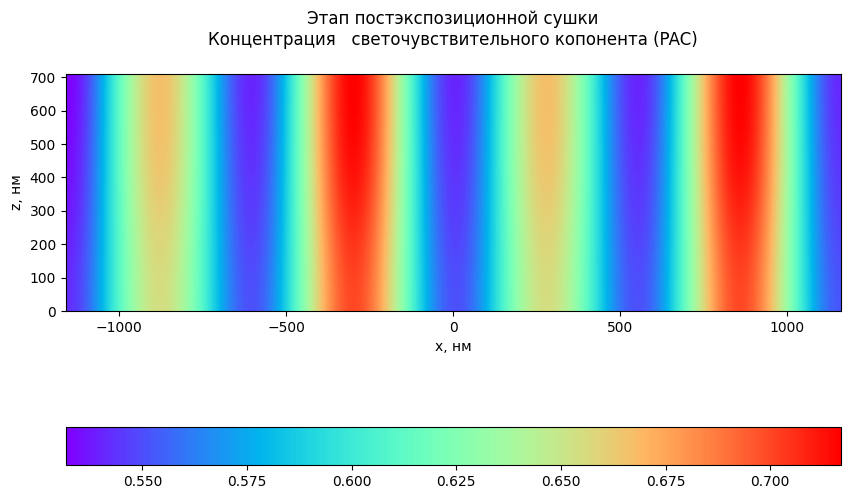

In [ ]:
t0 = time.perf_counter()
my_peb = step_peb_nocar1(150, 5, 5, my_m)
t1 = time.perf_counter()
print(f"Время операции: {round(t1 - t0, 6)} с")
step_peb_nocar_plot(x_data, z_data, my_peb)

##2 способ: функция convolve2d из scipy.signal

Плюс:

Мы сами можем задать матрицу, с которой будет сворачиваться функция.

Минус:

Нет автоматической обрезки матрицы до kernel_radius. Поэтому очень долго.

In [ ]:
from scipy import signal

In [ ]:
def step_peb_nocar2(sigma, m, x, z):   #работает оооочень медленно + не проверяла на ненулевых примерах
  gaussian = gauss(x, z, sigma, cut=True)
  return signal.convolve2d(m, gaussian, boundary='symm', mode='same')

Время операции: 16.017936 с


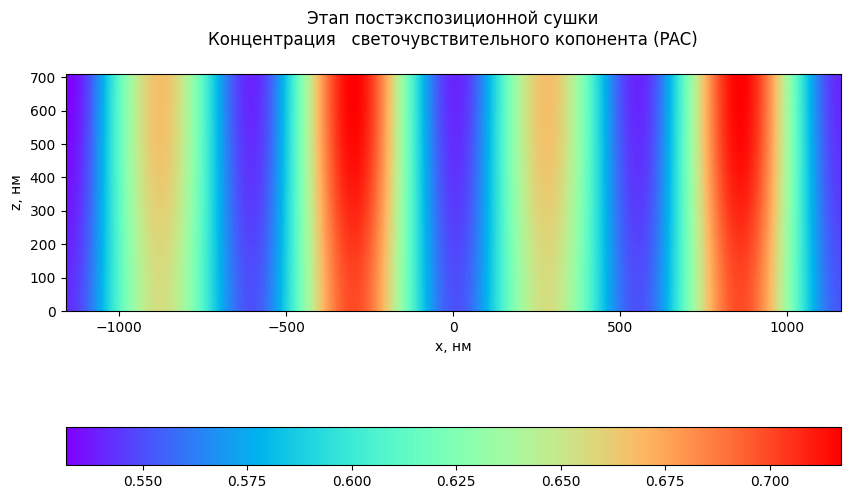

In [ ]:
t0 = time.perf_counter()
my_peb = step_peb_nocar2(150, my_m, x_data,z_data)
t1 = time.perf_counter()
print(f"Время операции: {round(t1 - t0, 6)} с")
step_peb_nocar_plot(x_data, z_data, my_peb)

##3 способ: nn.Conv2d из pytorch

Плюс:

Мы сами можем задать матрицу, с которой будет сворачиваться функция.

Минус:

Нет автоматической обрезки матрицы до kernel_radius. Поэтому долго.

In [ ]:
import torch
import torch.nn as nn

*The correct sizes should be*

*input: (batch_size, in_channels , height, width)*

*weight: (out_channels, in_channels , kernel_height, kernel_width)*

https://stackoverflow.com/questions/61269421/expected-stride-to-be-a-single-integer-value-or-a-list-of-1-values-to-match-the

In [ ]:
def step_peb_nocar3(sigma, m, x, z):   #работает медленно + не проверяла на ненулевых примерах
  gaussian = gauss(x_data, z_data, sigma, cut=True)
  new_conv = nn.Conv2d(1, 1, (len(x), len(z)), stride=1, padding=(len(gaussian) // 2, len(gaussian[0]) // 2), padding_mode='reflect')
  new_conv.weight.data = torch.from_numpy(np.expand_dims(np.expand_dims(gaussian, axis=0), axis=0)).float()
  return new_conv(torch.from_numpy(np.expand_dims(m, axis=0)).float()).squeeze().detach().numpy()

Время операции: 1.574983 с


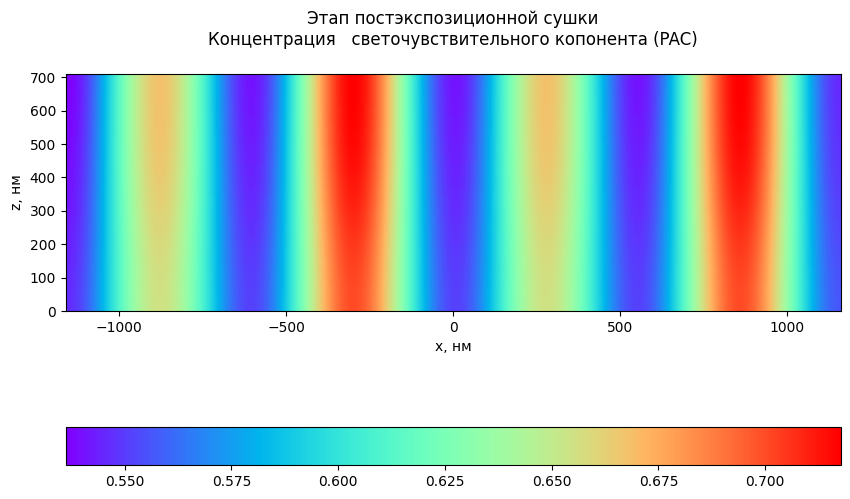

In [ ]:
t0 = time.perf_counter()
my_peb = step_peb_nocar3(150, my_m, x_data, z_data)
t1 = time.perf_counter()
print(f"Время операции: {round(t1 - t0, 6)} с")
step_peb_nocar_plot(x_data, z_data, my_peb)

##4 способ: ручная реализация через numpy


Реализация частично взята с:

https://gist.github.com/SamratSahoo/cef04a39a4033f7bec0299a10701eb95

In [ ]:
def convolve2D(image, kernel, padding=0):
    xKernShape = len(kernel)
    yKernShape = len(kernel[0])
    xImgShape = len(image)
    yImgShape = len(image[0])

    # Shape of Output Convolution
    output = np.zeros((xImgShape, yImgShape))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.pad(image, ((xKernShape // 2, xKernShape // 2),
         (yKernShape // 2, yKernShape // 2)), 'symmetric')
    else:
        imagePadded = image

    # Iterate through image
    for x in range(xImgShape):
      for y in range(yImgShape):
        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()

    return output

In [ ]:
def step_peb_nocar4(sigma, m, x, z):   #работает оооочень медленно + не проверяла на ненулевых примерах
  gaussian = gauss(x, z, sigma, cut=True)
  return convolve2D(m, gaussian, padding=1)

Время операции: 3.818491 с


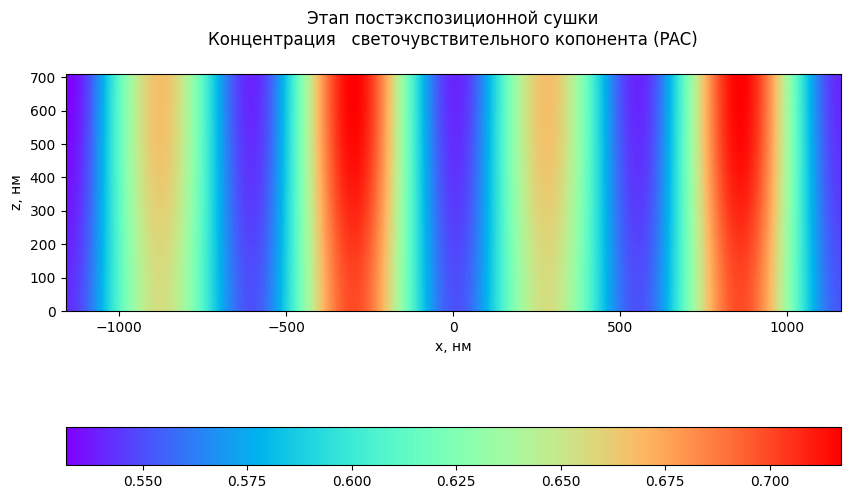

In [ ]:
t0 = time.perf_counter()
my_peb = step_peb_nocar4(150, my_m, x_data, z_data)
t1 = time.perf_counter()
print(f"Время операции: {round(t1 - t0, 6)} с")
step_peb_nocar_plot(x_data, z_data, my_peb)

##Сравнение времени расчётов

Значения времени, которые получились для разных способов для матрицы изображения размера 465x143 и ядра свёртки с $\sigma = 150 нм$, обрезанного до радиуса $4\sigma + 1$:


1.   **функция gaussian_filter из scipy.ndimage**....0.02-0.05 с
2.   **функция convolve2d из scipy.signal**..............15 с
3.   **nn.Conv2d из pytorch**.......................................1.8 с
4.   **"ручная" реализация через numpy**...............4.4 с

Из чего мы делаем вывод, что лучше всего использовать **gaussian_filter** из scipy.ndimage, при этом не забывая про зависимость параметра гауссиана от свёртки.



Сравним, насколько хорошо совпадают результаты свёрток при разных реализациях алгоритма.

In [ ]:
my_peb1 = step_peb_nocar1(150, 5, 5, my_m)
my_peb2 = step_peb_nocar2(150, my_m, x_data,z_data)
my_peb3 = step_peb_nocar3(150, my_m, x_data, z_data)
my_peb4 = step_peb_nocar4(150, my_m, x_data, z_data)
print(f"Сигма = 150 нм")
print(f"Максимальное отклонение my_peb1 - my_peb2: {np.abs(my_peb1 - my_peb2).max()}")
print(f"Максимальное отклонение my_peb2 - my_peb3: {np.abs(my_peb2 - my_peb3).max()}")
print(f"Максимальное отклонение my_peb1 - my_peb2: {np.abs(my_peb3 - my_peb4).max()}")

Сигма = 150 нм
Максимальное отклонение my_peb1 - my_peb2: 0.00030175448456637444
Максимальное отклонение my_peb2 - my_peb3: 0.007979817883074447
Максимальное отклонение my_peb1 - my_peb2: 0.007979817883073337


In [ ]:
my_peb1 = step_peb_nocar1(15, 5, 5, my_m)
my_peb2 = step_peb_nocar2(15, my_m, x_data,z_data)
my_peb3 = step_peb_nocar3(15, my_m, x_data, z_data)
my_peb4 = step_peb_nocar4(15, my_m, x_data, z_data)
print(f"Сигма = 15 нм")
print(f"Максимальное отклонение my_peb1 - my_peb2: {np.abs(my_peb1 - my_peb2).max()}")
print(f"Максимальное отклонение my_peb2 - my_peb3: {np.abs(my_peb2 - my_peb3).max()}")
print(f"Максимальное отклонение my_peb1 - my_peb2: {np.abs(my_peb3 - my_peb4).max()}")

Сигма = 15 нм
Максимальное отклонение my_peb1 - my_peb2: 2.0542926658650984e-06
Максимальное отклонение my_peb2 - my_peb3: 0.0022584377477758433
Максимальное отклонение my_peb1 - my_peb2: 0.0022584377477757878


In [ ]:
my_peb1 = step_peb_nocar1(1, 5, 5, my_m)
my_peb2 = step_peb_nocar2(1, my_m, x_data,z_data)
my_peb3 = step_peb_nocar3(1, my_m, x_data, z_data)
my_peb4 = step_peb_nocar4(1, my_m, x_data, z_data)
print(f"Сигма = 1 нм")
print(f"Максимальное отклонение my_peb1 - my_peb2: {np.abs(my_peb1 - my_peb2).max()}")
print(f"Максимальное отклонение my_peb2 - my_peb3: {np.abs(my_peb2 - my_peb3).max()}")
print(f"Максимальное отклонение my_peb1 - my_peb2: {np.abs(my_peb3 - my_peb4).max()}")

Сигма = 1 нм
Максимальное отклонение my_peb1 - my_peb2: 4.440892098500626e-16
Максимальное отклонение my_peb2 - my_peb3: 0.0007249136568814318
Максимальное отклонение my_peb1 - my_peb2: 0.0007249136568813208


Видим, что значения максимально различаются в 3ем знаке, причём, на вход мы подаём распределение, где числа колеблются где-то от 0.3 до 1.0. Т.е. можем считать, что результаты совпадают.

**Вывод**: наилучшую скорость вычислений показала функция **gaussian_filter из scipy.ndimage**, поэтому в дальнейшем будем пользоваться ей.